In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import itertools
import seaborn as sns

In [12]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, 'C:/Users/aejew/OneDrive - Danmarks Tekniske Universitet/Dokumenter/GitHub/Closed-form-AA')

import AALS

In [13]:
X = np.load("C:/Users/aejew/OneDrive - Danmarks Tekniske Universitet/Dokumenter/GitHub/RBOAA/SyntheticData/synthetic_data_naive.pkl", allow_pickle=True)
X

array([[1, 2, 3, ..., 4, 2, 3],
       [1, 2, 3, ..., 4, 1, 3],
       [1, 1, 4, ..., 5, 1, 2],
       ...,
       [1, 2, 3, ..., 4, 2, 3],
       [1, 2, 4, ..., 5, 2, 2],
       [1, 2, 4, ..., 5, 3, 3]])

In [14]:
unique, counts = np.unique(X, return_counts=True)

In [15]:
counts

array([ 268, 2576, 4525, 4707, 2622,  302], dtype=int64)

In [18]:
df = pd.read_csv("C:/Users/aejew/OneDrive - Danmarks Tekniske Universitet/Dokumenter/GitHub/RBOAA/SyntheticData/50_respondents/data_complex_OSM_Small.csv", index_col=0)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
1,4.575213,2.446313,4.575213,3.945028,3.945028,3.945028,3.945028,3.945028,3.945028,3.945028,2.446313,5.000000,3.945028,3.945028,3.945028,3.945028,3.945028,5.000000,3.945028,2.446313
2,5.000000,5.000000,3.945028,5.000000,5.000000,3.945028,5.000000,3.945028,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.945028,5.000000,5.000000,5.000000,5.000000,3.945028
3,5.000000,1.000000,5.000000,4.575213,1.000000,4.575213,4.575213,2.446313,4.575213,4.575213,1.000000,5.000000,2.446313,1.000000,5.000000,4.575213,4.575213,5.000000,4.575213,1.000000
4,2.446313,1.000000,2.446313,4.575213,1.000000,2.446313,2.446313,1.000000,1.000000,1.000000,1.000000,4.575213,2.446313,2.446313,1.000000,2.446313,4.575213,4.575213,1.000000,1.000000
5,1.000000,1.000000,1.000000,2.446313,3.945028,1.000000,2.446313,1.000000,2.446313,2.446313,2.446313,5.000000,1.000000,1.000000,1.000000,2.446313,2.446313,3.945028,2.446313,1.000000
6,4.575213,2.446313,4.575213,4.575213,3.945028,3.945028,4.575213,3.945028,3.945028,3.945028,2.446313,5.000000,4.575213,3.945028,4.575213,4.575213,4.575213,5.000000,3.945028,2.446313
7,4.575213,3.945028,4.575213,5.000000,3.945028,3.945028,4.575213,3.945028,3.945028,3.945028,3.945028,5.000000,3.945028,3.945028,3.945028,4.575213,4.575213,5.000000,3.945028,2.446313
8,3.945028,1.000000,3.945028,2.446313,2.446313,2.446313,2.446313,2.446313,2.446313,2.446313,1.000000,5.000000,2.446313,2.446313,2.446313,2.446313,2.446313,3.945028,2.446313,1.000000
9,5.000000,3.945028,5.000000,4.575213,5.000000,4.575213,4.575213,3.945028,5.000000,5.000000,4.575213,5.000000,3.945028,3.945028,5.000000,5.000000,4.575213,5.000000,5.000000,2.446313
10,3.945028,3.945028,3.945028,3.945028,3.945028,2.446313,3.945028,2.446313,3.945028,3.945028,3.945028,4.575213,2.446313,3.945028,3.945028,3.945028,3.945028,4.575213,3.945028,2.446313


In [19]:
from py_pcha import PCHA

In [20]:
df.values.T.shape

(20, 50)

In [23]:
Stest = np.load("C:/Users/aejew/OneDrive - Danmarks Tekniske Universitet/Dokumenter/GitHub/RBOAA/SyntheticData/50_respondents/A.npy")

In [25]:
Stest.shape

(3, 50)

In [ ]:
K_list = list(range(2,11))

Loss = np.zeros((len(K_list),10))
S_save = np.zeros((len(K_list),10),dtype=object)
idx = 0
for i in K_list:
    
    for j in range(10):
        

        C =np.log(np.random.rand(50,i))
        C = C / C.sum(axis=0)[None,:]
        S = np.log(np.random.rand(i,50))
        S = S / S.sum(axis=0)[None,:] 

        C,S_save[idx,j],L, EV,lossS,lossC  =AALS.AA(df.values.T,C,S,50,i)

        

        Loss[idx,j] = L[-1]
    idx +=1


In [ ]:
def calcMI(z1,z2):
    eps = 10e-16
    P = z1@z2.T
    PXY = P/P.sum()
    PXPY = np.outer(np.expand_dims(PXY.sum(1), axis=0),np.expand_dims(PXY.sum(0), axis=1))
    ind = np.nonzero(PXY>0)
    MI = np.sum(PXY*np.log(eps+PXY/(eps+PXPY)))
    return MI
    
def calcNMI(z1,z2):
    NMI=(2*calcMI(z1,z2))/(calcMI(z1,z1)+calcMI(z2,z2))
    #NMI = NMI.reshape((z1.shape[0], z1.shape[0]))
    
    return NMI

In [ ]:
test = itertools.combinations(range(10), 2)
t = list(test)
calcIDX = np.array(t)
## Create big NMI loop
NMITSOAA = np.zeros((len(K_list),len(calcIDX)))
for i in range(len(K_list)):
    for j in range(len(calcIDX)):
        NMITSOAA[i,j] = calcNMI(S_save[i][calcIDX[j][0]], S_save[i][calcIDX[j][1]])

In [ ]:
import pandas as pd
df1 = pd.DataFrame(NMITSOAA.T, columns = K_list)
#df2 = pd.DataFrame(NMIPCHA.T, columns = n_arc_list)

df1['Method'] = 'TSOAA'
#df2['Method'] = 'PCHA'

df1 = df1.melt(id_vars='Method', var_name='Archetypes', value_name='NMI')
#df2 = df2.melt(id_vars='Method', var_name='Archetypes', value_name='NMI')

#df = pd.concat([df2,df1])

df = df1 

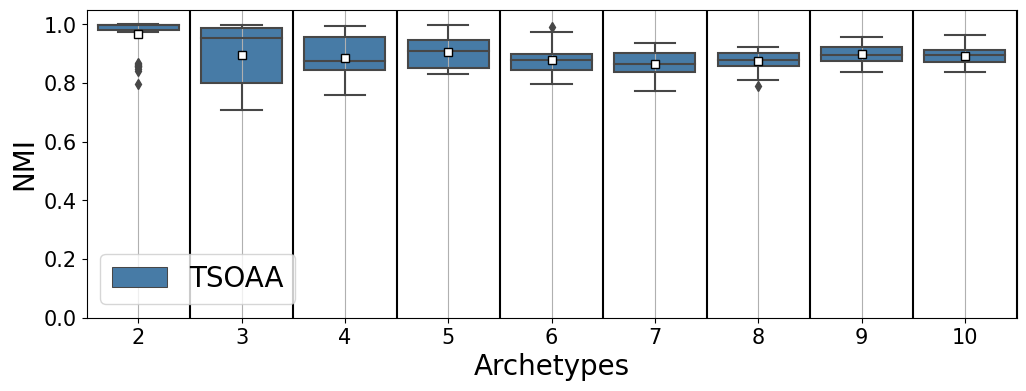

In [ ]:

my_pal = {"PCHA": "#e42628", "TSOAA": "#377db6"}
fig, ax = plt.subplots(1,1,figsize = (12,4))

ax = sns.boxplot(x='Archetypes', y="NMI", hue="Method", showmeans=True, data=df,palette=my_pal,meanprops={"marker": "s", "markerfacecolor": "white", "markeredgecolor": "black"})

#ax.axvline(linewidth=2, color='r')
ax.xaxis.grid(True, which='major')
[ax.axvline(x+.5,color='k') for x in ax.get_xticks()]
ax.set_ylabel("NMI", size=20)
ax.set_ylim([0,1.05])
ax.set_xlabel("Archetypes", size=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.legend(fontsize=20)


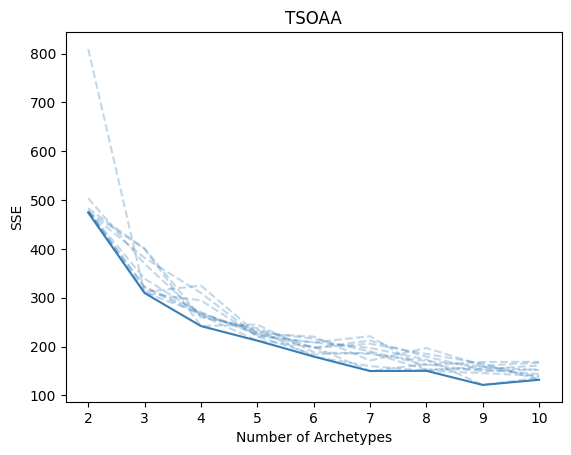

In [ ]:


fig, ax = plt.subplots()
ax.set_title("TSOAA")

for i in range(Loss.shape[1]):
    ax.plot(range(len(Loss[:,i])), Loss[:,i], '--',color="#377db6",alpha = 0.3)

ax.plot(range(len(np.min(Loss, axis=1)),), np.min(Loss, axis=1), '-',color="#377db6", label='Least Squares',alpha=1)
ax.set_xticks(list(range(9)))
ax.set_xticklabels(list(range(2,11)))

ax.set(xlabel='Number of Archetypes', ylabel='SSE')


plt.show()